# load data

from sklearn.datasets import load_iris, fetch_california_housing

In [4]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
import pandas as pd

In [9]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [10]:
iris_data['species'] = iris.target_names[iris.target]
iris_data.head(3).append(iris_data.tail(3))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [22]:
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

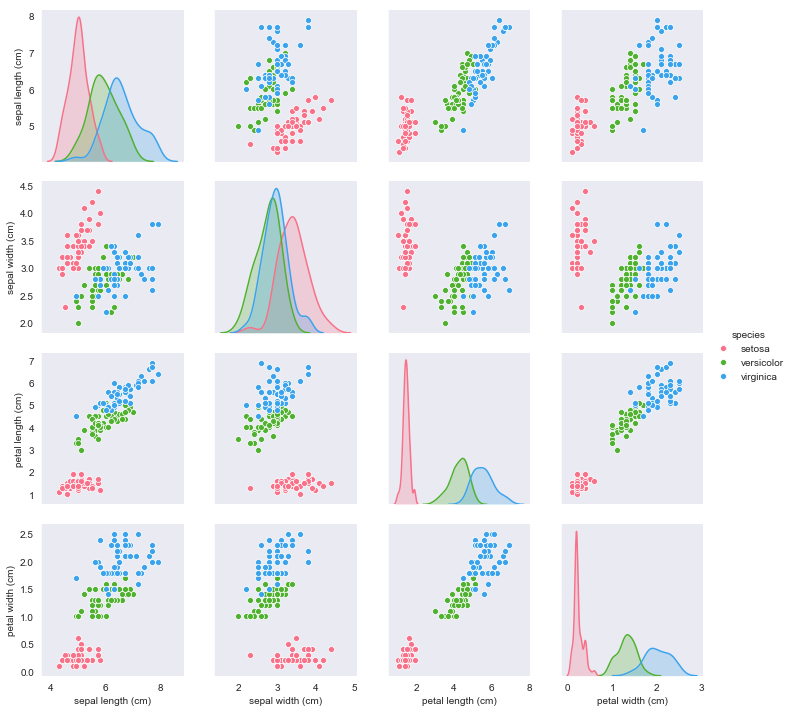

In [82]:
sns.pairplot(iris_data, hue='species', palette='husl')

In [24]:
california_housing = fetch_california_housing()
california_housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [25]:
california_housing.data.shape

(20640, 8)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression(normalize=True)

In [28]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

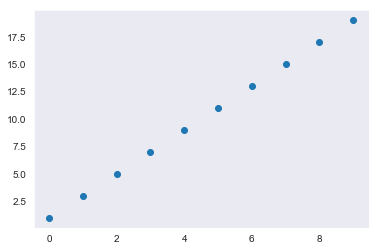

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10)
y = 2 * x + 1
plt.plot(x, y, 'o')

In [30]:
X = x[:, np.newaxis]
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [31]:
model.coef_

array([2.])

In [32]:
model.intercept_

1.0

# KMeans

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
X = iris.data[:, 0:2]
kmeans_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
kmeans_model.cluster_centers_

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [37]:
kmeans_model.inertia_

37.05070212765958

In [38]:
import scikitplot as skplt

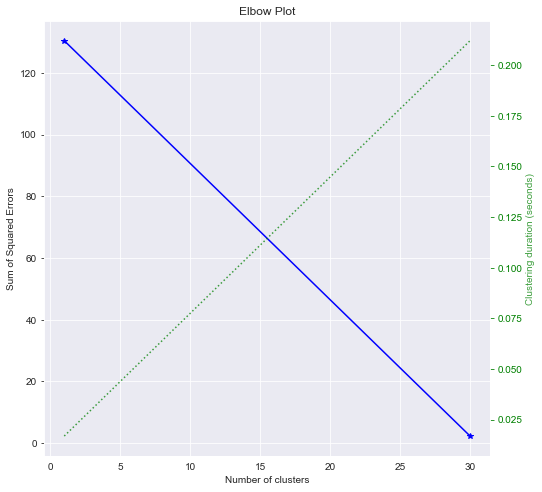

In [39]:
skplt.cluster.plot_elbow_curve(kmeans_model, X, cluster_ranges=(1, 30), figsize=(8, 8))
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=1)
X_train.shape

(120, 4)

In [42]:
KM = KMeans(n_clusters=3, random_state=1)

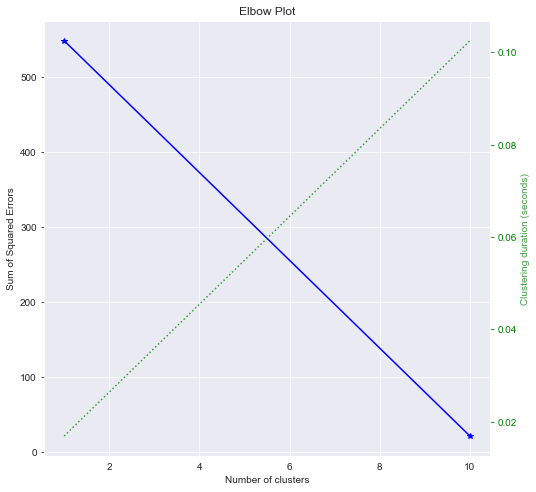

In [43]:
skplt.cluster.plot_elbow_curve(KM, X_train, cluster_ranges=(1, 10), figsize=(8, 8))
plt.show()

In [44]:
cluster_labels = KM.fit_predict(X_train)

In [45]:
print(cluster_labels)

[0 2 0 2 0 1 0 1 0 2 2 1 0 2 0 2 1 1 1 0 1 1 2 2 2 2 0 0 2 0 1 0 0 1 1 2 1
 0 2 0 0 2 0 1 0 0 2 0 2 0 1 1 1 2 1 0 2 0 1 1 0 1 2 0 2 2 0 2 2 0 1 0 1 0
 2 1 0 1 1 2 0 2 1 1 0 1 0 1 2 0 1 2 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1
 2 0 2 0 0 2 0 2 1]


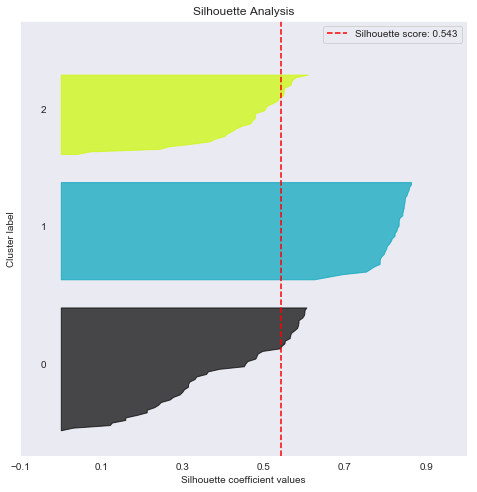

In [46]:
skplt.metrics.plot_silhouette(X_train, cluster_labels, figsize=(8, 8))
plt.show()

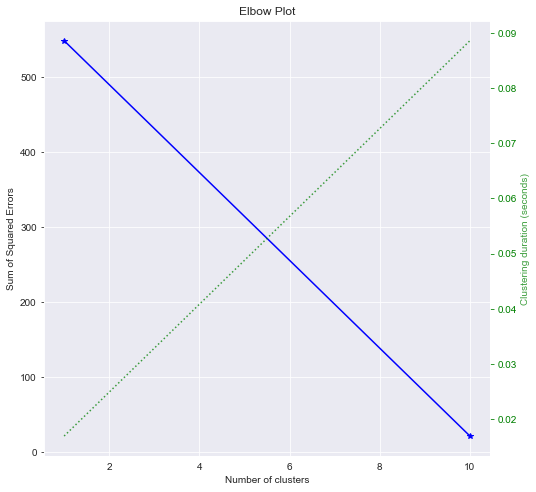

In [47]:
skplt.cluster.plot_elbow_curve(KM, X_train, cluster_ranges=(1, 10), figsize=(8, 8))
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_pred = model.predict(X_test)
p_pred = model.predict_proba(X_test)

In [51]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [52]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [53]:
p_pred

array([[9.84743004e-01, 1.52569743e-02, 2.17331537e-08],
       [2.75807897e-01, 7.21546416e-01, 2.64568700e-03],
       [6.28562704e-03, 8.89246072e-01, 1.04468301e-01],
       [9.85514294e-01, 1.44856424e-02, 6.32879459e-08],
       [1.18409856e-06, 1.90128147e-02, 9.80986001e-01],
       [4.52961285e-03, 6.27789060e-01, 3.67681327e-01],
       [1.47248887e-04, 1.27785592e-01, 8.72067159e-01],
       [9.57836808e-01, 4.21619652e-02, 1.22721334e-06],
       [9.69564753e-01, 3.04349381e-02, 3.09062575e-07],
       [9.76634135e-06, 2.70622232e-02, 9.72928010e-01],
       [1.89851185e-02, 8.79764878e-01, 1.01250003e-01],
       [9.66508713e-01, 3.34908451e-02, 4.42007663e-07],
       [4.72772952e-06, 3.10242845e-02, 9.68970988e-01],
       [7.15238192e-03, 8.01822096e-01, 1.91025522e-01],
       [6.98139105e-03, 7.49195550e-01, 2.43823059e-01],
       [9.88101691e-01, 1.18982423e-02, 6.71382918e-08],
       [2.25074996e-02, 9.37019566e-01, 4.04729341e-02],
       [1.09608435e-02, 6.81799

In [54]:
print(model.score(X_test, y_test))

0.9666666666666667


In [55]:
enc = ['win', 'draw', 'lose', 'win']
dec = ['draw', 'draw', 'win']

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
LE = LabelEncoder()
print(LE.fit(enc))

LabelEncoder()


In [58]:
print(LE.classes_)

['draw' 'lose' 'win']


In [59]:
print(LE.transform(dec))

[0 0 2]


In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
OHE = OneHotEncoder()

In [62]:
num = LE.fit_transform(enc)

In [63]:
num

array([2, 0, 1, 2], dtype=int64)

In [64]:
OHE_y = OHE.fit_transform(num.reshape(-1, 1))

C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [65]:
OHE_y

<4x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [66]:
OHE_y.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [67]:
iris = load_iris()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=1)

In [69]:
from sklearn import metrics

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
RF = RandomForestClassifier(n_estimators=5, max_depth=5)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
RF.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1294170401, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=736286314, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fract

In [73]:
metrics.accuracy_score(y_train, RF.predict(X_train))

0.975

In [74]:
metrics.accuracy_score(y_test, RF.predict(X_test))

0.9666666666666667

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [76]:
LR = LogisticRegression(solver='lbfgs', multi_class='multinomial')
RF = RandomForestClassifier(n_estimators=5)
GNB = GaussianNB()


In [77]:
Ensemble = VotingClassifier(estimators=[('lr', LR), ('rf', RF), ('gnb', GNB)], voting='hard')

In [78]:
Ensemble.fit(X_train, y_train)

C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', ...e, verbose=0,
            warm_start=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [79]:
Ensemble.estimators_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='multinomial',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09)]

In [80]:

LR.fit( X_train, y_train )
RF.fit( X_train, y_train )
GNB.fit( X_train, y_train )

C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
metrics.accuracy_score(y_train, LR.predict(X_train))

0.9833333333333333

In [147]:
metrics.accuracy_score(y_train, RF.predict(X_train))

0.9833333333333333

In [148]:
metrics.accuracy_score(y_train, GNB.predict(X_train))

0.95

In [149]:
metrics.accuracy_score(y_train, Ensemble.predict(X_train))

0.9833333333333333

In [150]:
from sklearn.datasets import load_digits

In [151]:
digits = load_digits()

In [152]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [191]:
X_train, X_test, y_train, y_test = train_test_split( digits['data'], digits['target'], test_size=0.2 )
y_train.shape

(1437,)

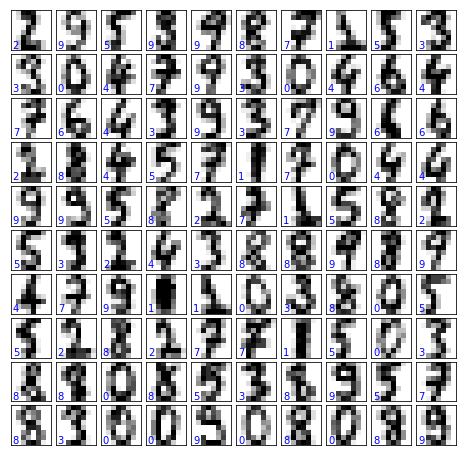

In [154]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i, :].reshape(8, 8), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_train[i]), transform=ax.transAxes, color='blue')
    ax.set_xticks([])
    ax.set_yticks([])

In [155]:
from sklearn.multiclass import OneVsOneClassifier

In [156]:
ovo_lr = OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=200))
ovo_lr.fit(X_train, y_train)

C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [157]:
print(len(ovo_lr.estimators_))

45


In [158]:
metrics.accuracy_score(y_train, ovo_lr.predict(X_train))

1.0

In [159]:
metrics.accuracy_score(y_test, ovo_lr.predict(X_test))

0.9888888888888889

In [160]:
from sklearn.multiclass import OneVsRestClassifier

In [161]:
ova_lr = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=200))
ova_lr.fit(X_train, y_train)

C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iter

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [162]:
print(len(ova_lr.estimators_))

10


In [163]:
metrics.accuracy_score(y_train, ova_lr.predict(X_train))

0.9979123173277662

In [164]:
metrics.accuracy_score(y_test, ova_lr.predict(X_test))

0.9805555555555555

In [165]:
import urllib.request
import os
from sklearn import preprocessing
import numpy as np
np.random.seed(10)
import pandas as pd

url="http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"
filepath="titanic3.xls"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)

In [166]:
all_df = pd.read_excel("titanic3.xls")

In [167]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [168]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [169]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_One_Hot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_One_Hot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [170]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
model = LogisticRegression(solver='lbfgs')

In [173]:
model.fit(train_Features, train_Label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [174]:
model.score(test_Features, test_Label)

0.8072727272727273

In [175]:
from sklearn.naive_bayes import MultinomialNB

In [176]:
gauss_model = MultinomialNB()

In [177]:
gauss_model.fit(train_Features, train_Label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [178]:
model.score(test_Features, test_Label)

0.8072727272727273

In [179]:
from sklearn.svm import SVC

In [180]:
svc_model = SVC(kernel='rbf', C=1E6)
svc_model.fit(train_Features, train_Label)

C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [181]:
svc_model.score(test_Features, test_Label)

0.7890909090909091

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [183]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

In [184]:
bag.fit(train_Features, train_Label)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [185]:
bag.score(test_Features, test_Label)

0.7781818181818182

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)

In [188]:
forest.fit(train_Features, train_Label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [189]:
forest.score(test_Features, test_Label)

0.7745454545454545